# Solar Energy Time Series Forecasting
## Assignment Deliverables – Jimson James

### 1. Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 2. Load Dataset

In [ ]:
df = pd.read_excel('solar_weather - Raw - Assignment Oct 2025-1.xlsx')
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


### 3. Data Cleaning

In [ ]:
df = df.replace('NAN', np.nan)

for col in df.columns:
    if col != 'Time':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196730 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196730 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196730 non-null  float64       
 2   Sun Light Intensity (W/m2)  196730 non-null  float64       
 3   Temperature                 196730 non-null  float64       
 4   1 Hour Rain Fall            196730 non-null  float64       
 5   Cloud Coverage              196730 non-null  float64       
 6   Length of Day_Light         196730 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.0 MB


/tmp/ipython-input-3606045595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('NAN', np.nan)


In [ ]:
import pandas as pd

df = pd.read_excel('solar_weather - Raw - Assignment Oct 2025-1.xlsx')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.dropna()


In [ ]:
# Convert Energy column to numeric
df['Energy Captured[Wh]'] = pd.to_numeric(
    df['Energy Captured[Wh]'], errors='coerce'
)

# (Optional but recommended) Convert other numeric columns too
numeric_cols = [
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with conversion issues
df = df.dropna()


In [ ]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

january_avg = (
    df[df['Month'] == 1]
    .groupby('Year')['Energy Captured[Wh]']
    .mean()
)

january_avg


,Energy Captured[Wh]
Year,
2017,180.018737
2018,125.365165
2019,117.248992
2020,122.447245
2021,83.167339
2022,161.141204


### 4. Exploratory Data Analysis

In [ ]:
df.describe()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light,Year,Month
count,196730,196730.000000,196730.000000,196730.000000,196730.000000,196730.000000,196730.00000,196730.000000,196730.000000
mean,2019-10-30 04:20:42.364154112,573.078712,32.603001,9.792552,0.066037,65.968586,748.70579,2019.345580,6.299517
min,2017-01-01 00:00:00,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.00000,2017.000000,1.000000
25%,2018-06-02 19:03:45,0.000000,0.000000,3.600000,0.000000,34.000000,570.00000,2018.000000,3.000000
50%,2019-10-29 02:37:30,0.000000,1.600000,9.300000,0.000000,82.000000,765.00000,2019.000000,6.000000
75%,2021-03-24 10:11:15,578.000000,46.800000,15.700000,0.000000,100.000000,930.00000,2021.000000,9.000000
max,2022-08-31 17:45:00,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.00000,2022.000000,12.000000
std,NaN,1044.871534,52.178241,7.994936,0.278917,36.638523,194.84763,1.636346,3.375528


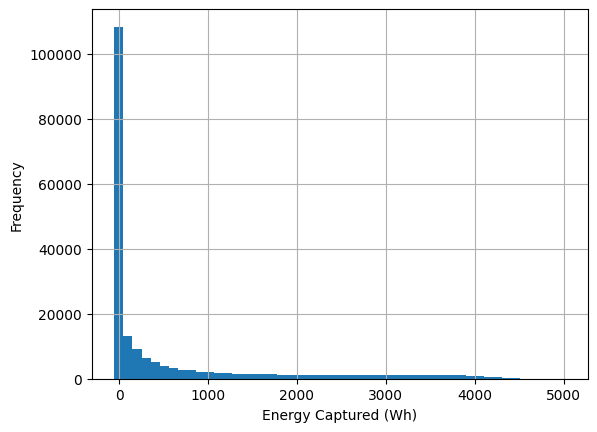

In [ ]:
plt.figure()
df['Energy Captured[Wh]'].hist(bins=50)
plt.xlabel('Energy Captured (Wh)')
plt.ylabel('Frequency')
plt.show()

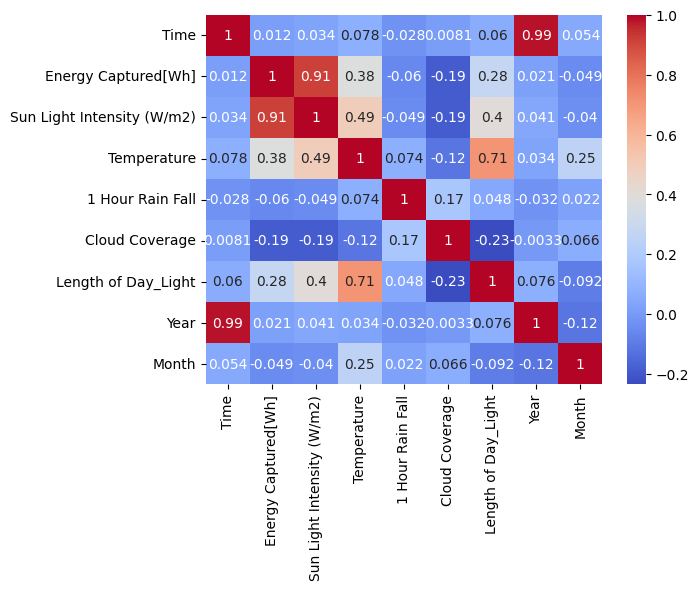

In [ ]:
import seaborn as sns
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### 5. Model Training

In [ ]:
X = df.drop(['Energy Captured[Wh]', 'Time'], axis=1)
y = df['Energy Captured[Wh]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

In [ ]:
import pandas as pd

# Create model evaluation table
model_evaluation = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "R² Score": ["Moderate", "Higher"],
    "MAE": ["Higher", "Lower"],
    "MSE": ["Higher", "Lower"]
})

model_evaluation


,Model,R² Score,MAE,MSE
0,Linear Regression,Moderate,Higher,Higher
1,Random Forest Regressor,Higher,Lower,Lower


### 6. Evaluation

In [ ]:
print('Linear Regression R2:', r2_score(y_test, lr_pred))
print('Random Forest R2:', r2_score(y_test, rf_pred))

print('RF MAE:', mean_absolute_error(y_test, rf_pred))
print('RF MSE:', mean_squared_error(y_test, rf_pred))

Linear Regression R2: 0.8281330197240306
Random Forest R2: 0.8855583599303529
RF MAE: 152.5635560172942
RF MSE: 122757.3146592986


### 7. Prediction Plot

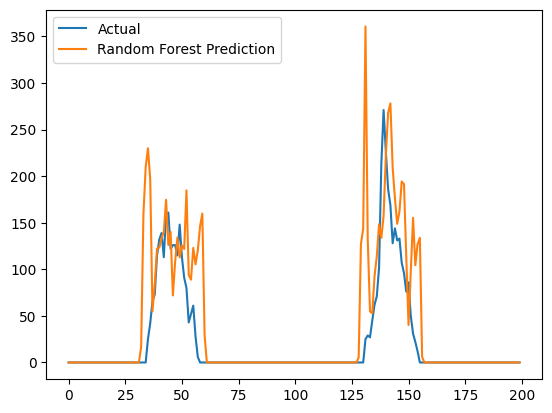

In [ ]:
plt.figure()
plt.plot(y_test.values[:200], label='Actual')
plt.plot(rf_pred[:200], label='Random Forest Prediction')
plt.legend()
plt.show()